In [2]:
# Import libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import xpress as xp
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
import folium
import osmnx as ox
import geopandas as gpd

In [3]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def vectorized_convert(df,easting_file,northing_file):
    vlon36, vlat36 = vgrid(easting_file, 
                           northing_file, 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

c:\Anaconda\envs\xpress_2023\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Customer

In [4]:
customer = pd.read_csv('CustomerId.csv').merge(pd.read_csv('CustomerNorthing.csv'), how='inner').merge(pd.read_csv('CustomerEasting.csv'), how='inner')
# customer.head()

easting_file = customer['CustomerEasting'].values
northing_file = customer['CustomerNorthing'].values

customer = vectorized_convert(customer,easting_file,northing_file)
customer.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_1412\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Customers,CustomerId,CustomerNorthing,CustomerEasting,longitude,latitude
0,1,AB10,805109,392949,-2.118129,57.136832
1,2,AB11,805438,394404,-2.094098,57.139808
2,3,AB12,800946,393407,-2.110451,57.099442
3,4,AB13,801808,385705,-2.237621,57.107009
4,5,AB14,801140,383616,-2.272063,57.100938


Candidates

In [5]:
candidates = pd.read_csv('CandidateId.csv').merge(pd.read_csv('CandidateEasting.csv'), how='inner').merge(pd.read_csv('CandidateNorthing.csv'), how='inner').merge(pd.read_csv('Capacity.csv'), how='inner').merge(pd.read_csv('Setup.csv'), how='inner').merge(pd.read_csv('Operating.csv'), how='inner')

easting_file = candidates['CandidateEasting'].values
northing_file = candidates['CandidateNorthing'].values

candidates = vectorized_convert(candidates,easting_file,northing_file)

candidates.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_1412\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Candidates,CandidateId,CandidateEasting,CandidateNorthing,Capacity,Setup,Operating,longitude,latitude
0,1,AB10,392949,805109,4320000,5424000,542400,-2.118129,57.136832
1,2,AB11,394404,805438,4360000,5312000,531200,-2.094098,57.139808
2,3,AB12,393407,800946,4720000,4388000,438800,-2.110451,57.099442
3,4,AB13,385705,801808,4760000,4318000,431800,-2.237621,57.107009
4,5,AB14,383616,801140,5040000,3716000,371600,-2.272063,57.100938


Suppliers

In [6]:
suppliers = pd.read_csv('SupplierId.csv').merge(pd.read_csv('SupplierEasting.csv'), how='inner').merge(pd.read_csv('SupplierNorthing.csv'), how='inner').merge(pd.read_csv('SupplierCapacity.csv'), how='inner').merge(pd.read_csv('SupplierProductGroup.csv'), how='inner').merge(pd.read_csv('SupplierVehicleType.csv'), how='inner')

easting_file = suppliers['SupplierEasting'].values
northing_file = suppliers['SupplierNorthing'].values

suppliers = vectorized_convert(suppliers,easting_file,northing_file)

suppliers.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_1412\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Suppliers,SupplierId,SupplierEasting,SupplierNorthing,SupplierCapacity,SupplierProductGroup,SupplierVehicleType,longitude,latitude
0,1,1,165124,823186,1708620,1,1,-5.894144,57.238907
1,2,2,218457,712442,1410738,1,1,-4.933282,56.269642
2,3,3,166352,777690,434234,1,2,-5.831583,56.831762
3,4,4,370643,797391,596810,1,2,-2.485744,57.066614
4,5,5,241260,687436,233900,1,2,-4.550559,56.053375


Cost Candidate Customer

In [7]:
cost_cand_cust = pd.read_csv('CostCandidateCustomers.csv')
cost_cand_cust = pd.merge(cost_cand_cust,candidates[['Candidates','CandidateId']],on="Candidates")
cost_cand_cust = pd.merge(cost_cand_cust,customer[['Customers','CustomerId']],on="Customers")
cost_cand_cust = cost_cand_cust.pivot(index='CandidateId', columns='CustomerId', values='CostCandidateCustomers')
cost_cand_cust.head()

CustomerId,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB21,AB22,AB23,...,TD14,TD15,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9
CandidateId,,,,,,,,,,,,,,,,,,,,,
AB10,0.000000,0.002142,0.006222,0.009153,0.015649,0.004062,0.005245,0.014072,0.010490,0.011415,...,0.299384,0.316182,0.257666,0.271926,0.270058,0.289906,0.277514,0.280119,0.295099,0.300961
AB11,0.002622,0.000000,0.007799,0.015563,0.017226,0.006273,0.006496,0.013969,0.007696,0.009941,...,0.300944,0.317758,0.259242,0.273503,0.271635,0.291483,0.279091,0.281696,0.296676,0.302538
AB12,0.006547,0.007524,0.000000,0.015135,0.016797,0.008810,0.009993,0.018837,0.015237,0.017140,...,0.294448,0.311245,0.252729,0.266990,0.265122,0.284987,0.272595,0.275183,0.290163,0.296042
AB13,0.009153,0.014895,0.015255,0.000000,0.004679,0.009427,0.014329,0.018751,0.022042,0.030852,...,0.297242,0.314056,0.255540,0.269801,0.267932,0.287781,0.275388,0.277994,0.292974,0.298836
AB14,0.015632,0.016592,0.016883,0.004679,0.000000,0.016352,0.015940,0.020362,0.023670,0.032480,...,0.298870,0.315685,0.257169,0.271412,0.269561,0.289409,0.277017,0.279622,0.294585,0.300464


Cost Candidate Supplier

In [8]:
cost_cand_sup = pd.read_csv('CostCandidateSupplier.csv')
cost_cand_sup = pd.merge(cost_cand_sup,candidates[['Candidates','CandidateId']],on="Candidates")
cost_cand_sup = pd.merge(cost_cand_sup,suppliers[['Suppliers','SupplierId']],on="Suppliers")
cost_cand_sup = cost_cand_sup.pivot(index='CandidateId', columns='SupplierId', values='CostCandidateSupplier')
cost_cand_sup

SupplierId,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
CandidateId,,,,,,,,,,,,,,,,,,,,,
AB10,0.071266,0.065109,0.258682,0.026006,0.203141,0.274118,0.018829,0.258106,0.034569,0.037388,...,0.174917,0.094406,0.001684,0.026294,0.024820,0.147514,0.167947,0.124387,0.049717,0.207734
AB11,0.071129,0.065320,0.260410,0.026827,0.203947,0.274939,0.019037,0.258912,0.034780,0.037596,...,0.175723,0.095227,0.002128,0.025747,0.024683,0.146966,0.168768,0.125208,0.049928,0.208555
AB12,0.073641,0.064051,0.264974,0.027058,0.199022,0.270000,0.017771,0.253987,0.033511,0.036330,...,0.170798,0.090288,0.003371,0.035539,0.027195,0.156758,0.163829,0.120283,0.048662,0.203616
AB13,0.071765,0.064639,0.253296,0.016819,0.201312,0.272290,0.018359,0.256277,0.034099,0.036919,...,0.173088,0.092578,0.000340,0.027634,0.025167,0.148853,0.166118,0.122573,0.049251,0.205906
AB14,0.071373,0.064998,0.251770,0.014846,0.202709,0.273686,0.018718,0.257674,0.034458,0.037277,...,0.174485,0.093974,0.001088,0.023918,0.024209,0.149170,0.167515,0.123970,0.049610,0.207302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TD5,0.095841,0.053717,0.326880,0.231869,0.159394,0.079416,0.045218,0.035813,0.036637,0.027502,...,0.104486,0.158990,0.062201,0.264499,0.081652,0.294192,0.122472,0.134453,0.014030,0.117691
TD6,0.093166,0.051041,0.316469,0.221458,0.148982,0.064224,0.042543,0.048946,0.033959,0.024827,...,0.094075,0.148579,0.059526,0.254088,0.078973,0.283781,0.112046,0.124042,0.011352,0.089438
TD7,0.093728,0.047049,0.318658,0.223646,0.151171,0.052776,0.043105,0.062208,0.034521,0.025389,...,0.096264,0.150754,0.060088,0.256277,0.079535,0.285970,0.114235,0.126230,0.011174,0.081490


In [9]:
demand = pd.read_csv('DemandPeriods.csv').merge(pd.read_csv('CustomerId.csv'),on='Customers')
demand[(demand['CustomerId']=='AB10') & (demand['Products']==1) & (demand['Periods']==1)]['DemandPeriods'].values

array([555], dtype=int64)

In [10]:
customer_demand = demand[['CustomerId','Periods','DemandPeriods']].groupby(['CustomerId','Periods']).sum().reset_index()
customer_demand = customer_demand.pivot(index='CustomerId', columns='Periods', values='DemandPeriods')
customer_demand.head()

Periods,1,2,3,4,5,6,7,8,9,10
CustomerId,,,,,,,,,,
AB10,3207,6104,9087,13131,15020,18296,20243,24993,27430,30657
AB11,16574,29179,53055,64066,77977,96255,114416,127677,150754,164159
AB12,33901,52240,82230,115903,143107,182525,210830,225300,269961,297677
AB13,3356,6265,9212,12369,17186,20146,23138,26498,30494,33948
AB14,4338,8843,12894,18920,21386,27301,32534,35428,39671,45164


distance_district_district


In [11]:
# demand_coord = np.column_stack((np.array(customer_coordinates['CustomerEasting']),customer_coordinates['CustomerNorthing']
# kmeans = KMeans(n_clusters= 10, init = 'random', n_init = 1, max_iter=300, random_state = 2)
# kmeans = kmeans.fit(demand_coord)

### Variables definition
The variables are:

w -> candidate warehouse c -> customer t -> time period

$x_{w,c,t}$ : is a binary variable that is 1 if a customer is served by a candidate warehouse in period t


$y_{w,t}$ : is a binary variable that is 1 if a candidate warehouse operates in period t

$s_{w}$ : is a binary variable that is 1 if a candidate warehouse is set

$z_{w,s,t}$ : is a binary variable that is 1 if a warehouse recive products by supplier s in period t

In [12]:
prob = xp.problem('tartan')

t = 10
x = {}
y = {}
z = {}
s = {}


for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            namex = 'x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)
            x[namex] = xp.var(vartype=xp.binary, name=namex)

for i in range(len(candidates)):
    for j in range(len(suppliers)):
        namez = 'z_{0}_{1}'.format(candidates['CandidateId'][i],suppliers['SupplierId'][j])
        z[namez] = xp.var(vartype=xp.continuous , name=namez)

for i in range(len(candidates)):
    names = 's_{0}'.format(candidates['CandidateId'][i])
    s[names] = xp.var(vartype=xp.binary, name=names)
    for k in range(t):
        namey = 'y_{0}_{1}'.format(candidates['CandidateId'][i],k)
        y[namey] = xp.var(vartype=xp.binary, name=namey)

prob.addVariable(x,y,z,s)

Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('C:/xpressmp/bin/xpauth.xpr')


### Constraints
Eeach customer is served only by one warehouse
$\sum_{x \in X}x_{w,c,t} = 1, \forall c \in C, t \in T$

In [13]:
# Constraints
for j in range(len(customer)):
    for k in range(t):
        prob.addConstraint(
            sum(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)]
            for i in range(len(candidates))
            ) == 1
        )


A customer only can be served by a warehouse if it is operating in this year $x_{w,c,t} \leq y_{w,t}, \forall w \in W, c \in C, t \in T$


In [14]:
for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            prob.addConstraint(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)] <= y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            )

To track if a warehouse is set in any year $\sum_{t \in T} y_{w,t} \leq Ts_{w}, \forall w \in W$

In [15]:
for i in range(len(candidates)):
    prob.addConstraint(
        sum(
                y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            for k in range(t)
            ) <= t*s['s_{0}'.format(candidates['CandidateId'][i])]
    )

If a warehouse is setup, then it operates the next years.

$y_{w,9} \geq y_{w,8} + ... + y_{w,0}, \forall w \in W$ 

In [16]:
for i in range(len(candidates)):
    for k in range(t-1):
        prob.addConstraint(
            y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)] <= y['y_{0}_{1}'.format(candidates['CandidateId'][i],k+1)]
        )


$\sum_{c \in C} x_{w,c,t}(\sum_{p \in P} d_{c,p}) \leq Capacity_{w}, \forall w \in W, t \in T$

In [17]:
for i in candidates['CandidateId']:
    for k in range(t):
        prob.addConstraint(
            sum(
                x['x_{0}_{1}_{2}'.format(i,j,k)]*customer_demand[k+1][j]
            for j in customer['CustomerId']
            ) <= candidates.loc[candidates['CandidateId'] == i, 'Capacity'].values[0]
        )	

$\sum_{w \in W}z_{w,s} = 1, \forall s \in S$

In [18]:
for j in range(len(suppliers)):
    prob.addConstraint(
        sum(
                z['z_{0}_{1}'.format(candidates['CandidateId'][i],suppliers['SupplierId'][j])]
            for i in range(len(candidates))
            ) ==1
    )

$\sum_{c \in C} d_{c,p} x_{w,c,t} \leq \sum_{s \in S} Capacity_{supplier} * z_{w,s}$

In [20]:
for i in candidates['CandidateId']:
    for k in range(t):
        for p in range(1,5):
            demand_p = demand[demand['Products']==p].pivot(index='CustomerId', columns='Periods', values='DemandPeriods')
            sup_p = suppliers[['SupplierId','SupplierCapacity']][suppliers['SupplierProductGroup']==p]
            prob.addConstraint(
                sum(
                    demand_p[k+1][j]*x['x_{0}_{1}_{2}'.format(i,j,k)]
                for j in customer['CustomerId']
                ) <= sum(
                    sup_p.loc[sup_p['SupplierId'] == j, 'SupplierCapacity'].values[0]
                    *z['z_{0}_{1}'.format(i,j)]
                    for j in sup_p['SupplierId']
                    )
    )

In [24]:
prob.setObjective(
        # warehouse-customer delivery
        xp.Sum(cost_cand_cust[i][j]*x['x_{0}_{1}_{2}'.format(i,j,k)]
        for i in candidates['CandidateId'] for j in customer['CustomerId'] for k in range(t))
        # setup cost
        + xp.Sum(candidates.loc[candidates['CandidateId']==i,'Setup'].values*s['s_{0}'.format(i)]
        for i in candidates['CandidateId'])
         # warehouse-supplier delivery
        + xp.Sum(cost_cand_sup[j][i]*z['z_{0}_{1}'.format(i,j)]
           for i in candidates['CandidateId'] for j in suppliers['SupplierId']
        )
        ,sense = xp.minimize)

In [25]:
# prob.write('reg','lp')

prob.solve()

FICO Xpress v9.2.2, Hyper, solve started 23:12:22, Feb 14, 2024
Heap usage: 1383MB (peak 1383MB, 313MB system)
Minimizing MILP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
   1966853 rows      1964160 cols     15733520 elements   1940840 entities
Presolved problem has:
   1966060 rows      1963280 cols     15580840 elements   1939960 entities
LP relaxation tightened
Presolve finished in 113 seconds
Heap usage: 2161MB (peak 2968MB, 313MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.53e+07] / [ 4.77e-07,  1.13e+01]
  RHS and bounds [min,max] : [ 1.00e+00,  8.00e+06] / [ 1.00e+00,  1.28e+02]
  Objective      [min,max] : [ 2.45e-04,  6.25e+06] / [ 3.83e-06,  6.25e+06]
Autoscaling applied standard scaling

Symmetric problem: generators: 1, support set: 880
 Number of orbits: 440, largest orbit: 2
 Row orbits: 441, row support: 882
Will 

(<SolveStatus.COMPLETED: 3>, <SolStatus.OPTIMAL: 1>)

In [26]:
prob.getObjVal()

3900552.943348118

In [27]:
prob.getSolution(y).items

<function dict.items>

In [29]:
filtered_dict = {key: value for key, value in prob.getSolution(s).items() if value > 0}
filtered_dict

{'s_DG10': 1.0,
 's_DG14': 1.0,
 's_PA30': 1.0,
 's_PA36': 1.0,
 's_PH32': 1.0,
 's_PH44': 1.0}

In [ ]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")

def vectorized_convert(df):
    vlon36, vlat36 = vgrid(pd.read_csv('SupplierEasting.csv').values[:,1], 
                           pd.read_csv('SupplierNorthing.csv').values[:,1], 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df

df = pd.DataFrame(pd.read_csv('SupplierEasting.csv').values[:,1],
                   pd.read_csv('SupplierNorthing.csv').values[:,1])

print(vectorized_convert(df))


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

             0  longitude   latitude
823186  165124  -5.894144  57.238907
712442  218457  -4.933282  56.269642
777690  166352  -5.831583  56.831762
797391  370643  -2.485744  57.066614
687436  241260  -4.550559  56.053375
607916  307598  -3.459005  55.356534
741339  365265  -2.566770  56.562721
656828  393634  -2.103127  55.804689
722990  301473  -3.597465  56.388875
691342  322640  -3.245456  56.108550
605168  220753  -4.825640  55.307861
860575  303245  -3.621677  57.624718
859291  254012  -4.444521  57.599941
831303  375965  -2.401279  57.371544
738621  331595  -3.113801  56.534603
731412  321506  -3.275618  56.468275
700536  331814  -3.100338  56.192537
742107  354964  -2.734495  56.568743
756986  356626  -2.709958  56.702559
747580  366976  -2.539732  56.618910
719628  337717  -3.009745  56.364848
729166  300525  -3.615162  56.444140
739462  315846  -3.370061  56.539598
721464  321090  -3.279364  56.378855
649214  377781  -2.355404  55.735806
664658  379705  -2.325923  55.874652
6

c:\Anaconda\envs\xpress_2023\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_32320\705001113.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


In [ ]:
plt.figure(figsize=(10, 10))
a = 2
m = Basemap(projection='gnom', lat_0=57, lon_0=-6.2,
                width=3E6, height=2E6, resolution='i',
                 llcrnrlon=df['longitude'].min()-a, llcrnrlat=df['latitude'].min()-a, urcrnrlon=df['longitude'].max()+a, urcrnrlat=df['latitude'].max()+a)
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
# m.shadedrelief(scale=0.9)
scatter = m.scatter(df['longitude'], df['latitude'], latlon=True,c=pd.read_csv('SupplierProductGroup.csv')['SupplierProductGroup'])



# plt.scatter(x = df['longitude'],y = df['latitude'])
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 1000x1000 with 0 Axes>

<Axes: >

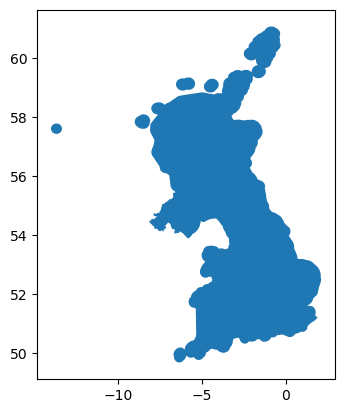

In [ ]:
place_name = "United Kingdom"
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area
area.plot()